# MOBILE PRICE CLASSIFICATION WITH RANDOM FOREST XG BOOST GRADIANT BOOST ALGORITHM
A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area.

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs).

In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth.

In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel.

source:https://en.wikipedia.org/wiki/Mobile_phone

Evolution of Mobile Phone

In this kernel, I analyzed mobile phone features with price range. Also I build a model using support vector machine algortihm.

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [27]:
train=pd.read_csv('../input/mobile-price-classification/train.csv')

In [28]:
train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [29]:
train.shape

(2000, 21)

In [30]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [31]:
train.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1


In [32]:
print(train.price_range.value_counts())
print(train.blue.value_counts())
print(train.dual_sim.value_counts())
print(train.four_g.value_counts())
print(train.mobile_wt.value_counts())

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64
0    1010
1     990
Name: blue, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
182    28
185    27
101    27
146    26
199    26
       ..
176    10
96      9
120     9
149     9
140     9
Name: mobile_wt, Length: 121, dtype: int64


In [33]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# EDA

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8145c5790>,
      dtype=object)

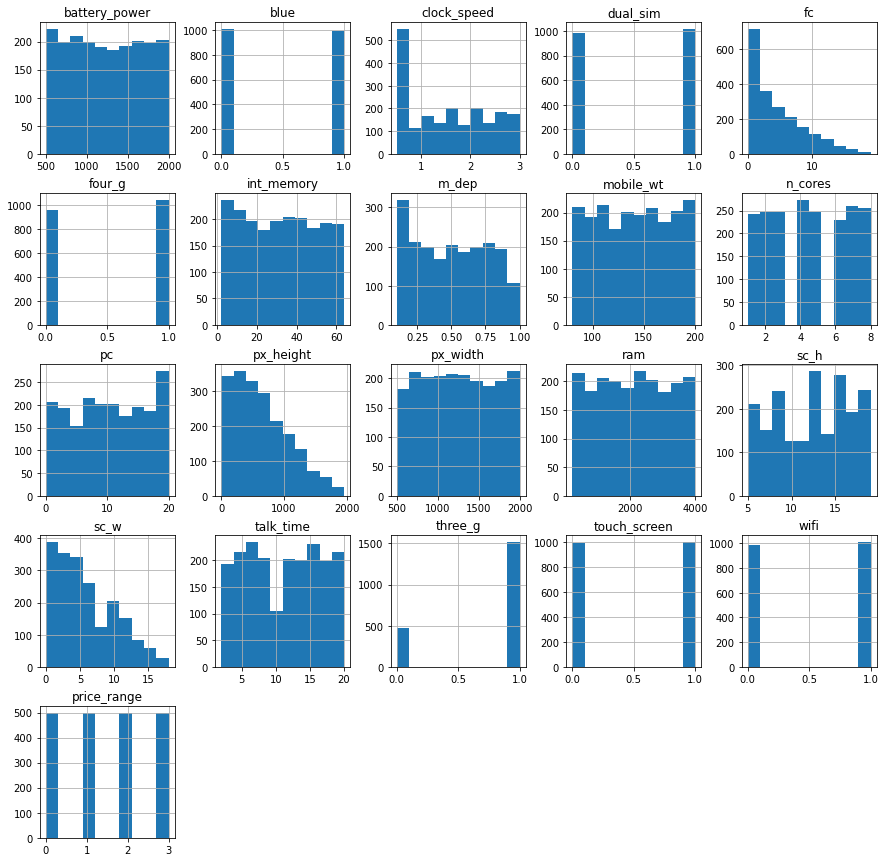

In [35]:
train.hist(figsize=(15,15))

In [36]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

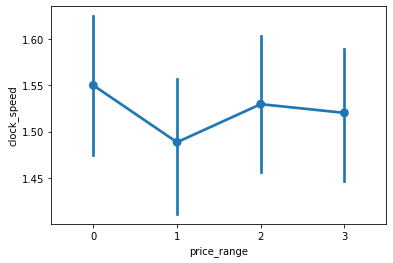

In [37]:
sns.pointplot(x='price_range',y='clock_speed',data=train)

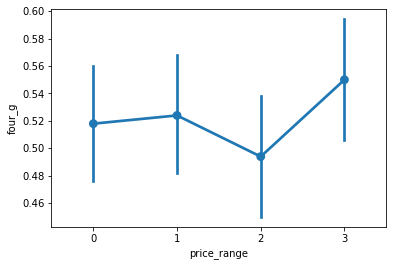

In [38]:
sns.pointplot(y='four_g',x='price_range',data=train)

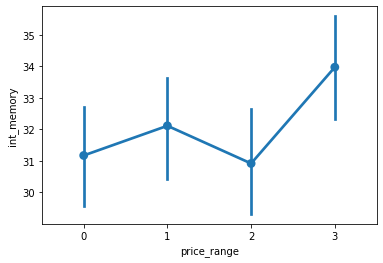

In [39]:
sns.pointplot(x='price_range',y='int_memory',data=train)

([<matplotlib.patches.Wedge at 0x7fb813953050>,
 [Text(-0.749214765200941, -0.8054050133969238, '3 g support '),
  Text(0.7492147652009411, 0.8054050133969237, 'not support')],
 [Text(-0.40866259920051323, -0.43931182548923114, '76.2%'),
  Text(0.4086625992005133, 0.4393118254892311, '23.8%')])

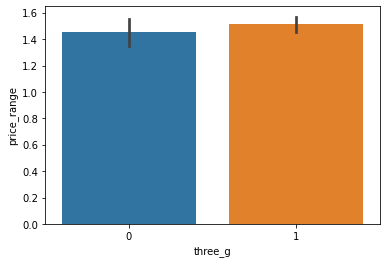

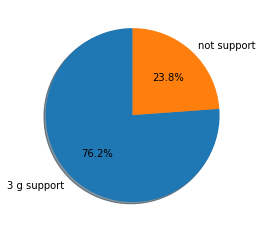

In [40]:
sns.barplot(x='three_g',y='price_range',data=train)
#check three g support or not using barplot
label=['3 g support ','not support']
values=train['three_g'].value_counts().values
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fb8139314d0>,
 [Text(-1.097491732278043, -0.07424215501546373, '4-g support'),
  Text(1.0974917322780433, 0.07424215501546359, 'not-support')],
 [Text(-0.5986318539698416, -0.04049572091752567, '52.1%'),
  Text(0.5986318539698418, 0.040495720917525596, '47.9%')])

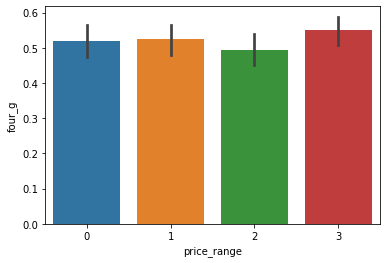

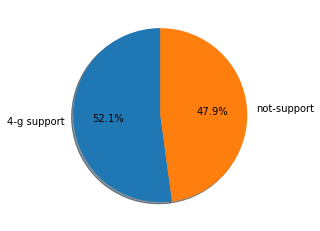

In [41]:
train.head(1)
sns.barplot(x='price_range',y='four_g',data=train)
label=['4-g support','not-support']
values=train['four_g'].value_counts().values
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')

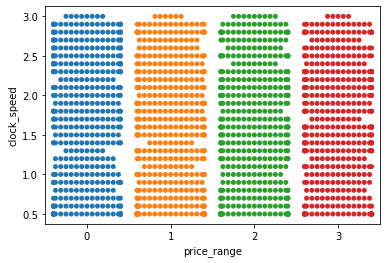

In [42]:
sns.swarmplot(x='price_range',y='clock_speed',data=train)

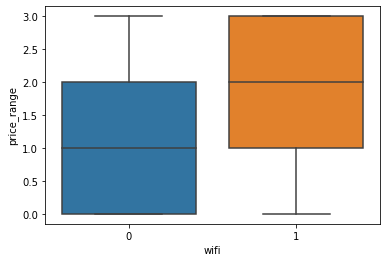

In [43]:
sns.boxplot(x='wifi',y='price_range',data=train)

Text(0.5, 0, 'megapixel')

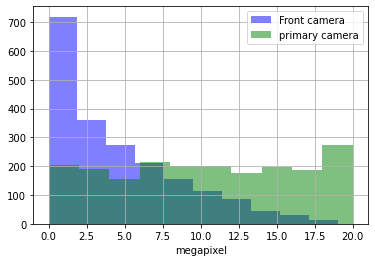

In [44]:
train.head(1)
#plt.figure(figsize=(10,6))
train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train['pc'].hist(alpha=0.5,color='green',label='primary camera')
plt.legend()
plt.xlabel('megapixel')

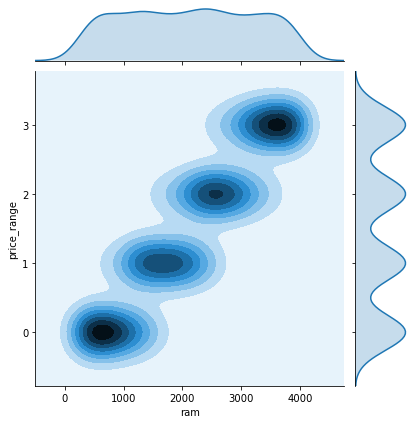

In [45]:
sns.jointplot(x='ram',y='price_range',data=train,kind='kde')

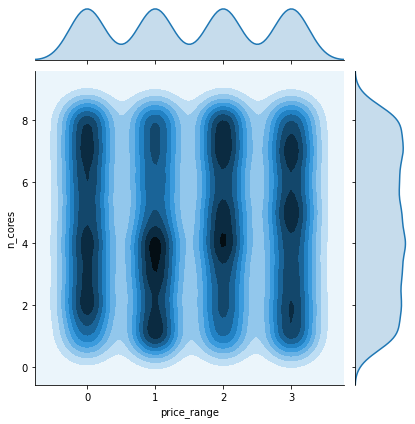

In [46]:
train.head(1)
sns.jointplot(y='n_cores',x='price_range',data=train,kind='kde')

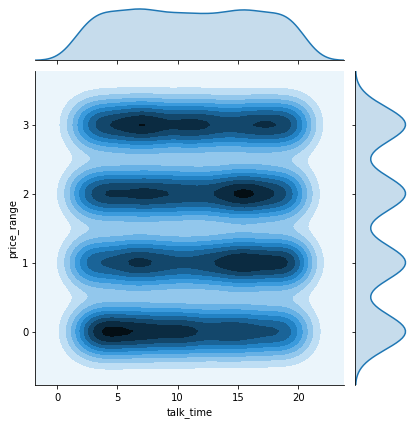

In [47]:
sns.jointplot(x='talk_time',y='price_range',kind='kde',data=train)

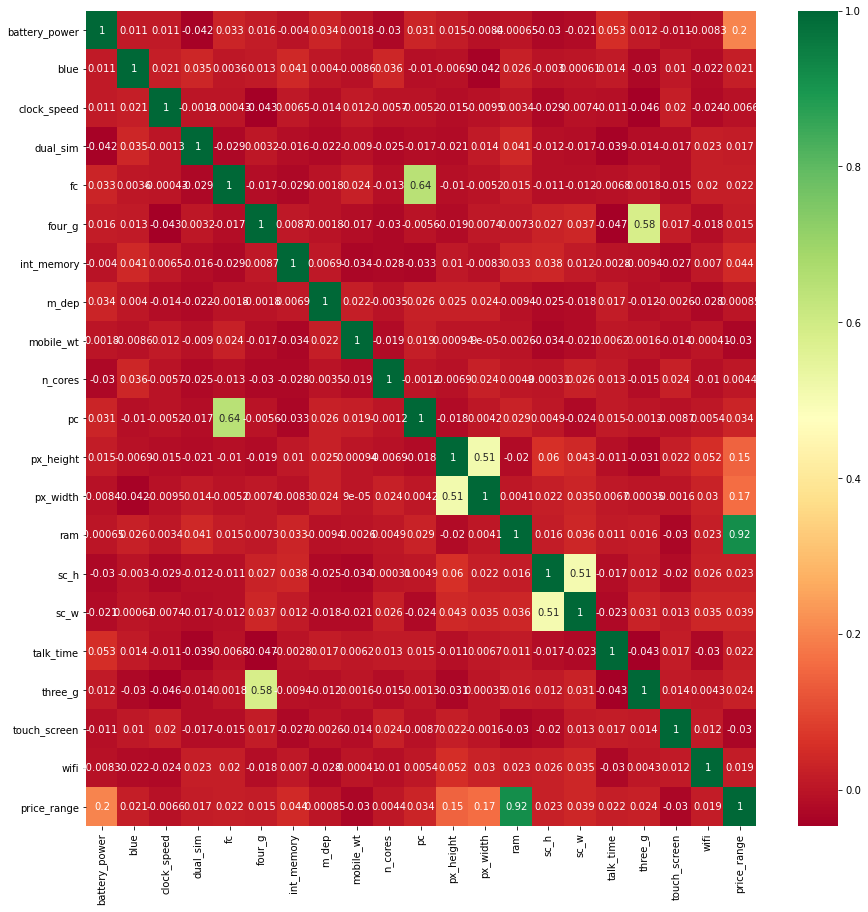

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),cmap='RdYlGn',annot=True)

# #X  and y mark down

In [48]:
train.head(1)
x=train.drop('price_range',axis=1)
y=(train['price_range'])

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.2)

In [84]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,bootstrap=True)
rfc.fit(X_train,y_train)
Y_pred=rfc.predict(X_test)
print('y predicted',Y_pred)
rfc.score(X_train,y_train)

y predicted [3 0 2 1 2 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 2 1 3 0 1 3 1 1 3 0 3 0 2 2 1 0 3 3 1 3 2 1 3 3 3 1 2 3 2 1 0
 1 3 2 2 2 1 3 3 3 0 0 0 2 0 2 3 1 2 3 0 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 2 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 1 0 1 1 2 2 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 2 2 3 3 0 1 2 3 0 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 3 0 1 3 2 0 3 3 3 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 2 0 2 0 0 0 3 3 0 2 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 2 3 2 2 2 1 0 2 1 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 0 1 3 0 0 2 3 1 2 0 1 0 3 0 3 3 2 3 1 1 2 1 1 1 0 1 0 3 1 0 3 1 0
 1 2 0 3 2 2 0 1 3 0 2 1 1 2 1 2 0 2 0 0 3 1 2 3 2 2 0 3 3 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 2 1 1 0 1 2 3 0 0 1 3 0 3 0 1 2 1 0 0 3 1]


1.0

In [85]:
rfc.score(X_test,y_test)

0.8675

In [86]:
#gattung more accurating result using boosting clasifier
gc=GradientBoostingClassifier()
gc.fit(X_train,y_train)
gc.fit(X_test,y_test)
gc.score(X_test,y_test)

1.0

In [87]:
import xgboost as xgb

In [88]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.fit(X_test,y_test)
Y_pred=xgb_model.predict(X_test)
Y_pred

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [89]:
xgb_model.score(X_test,y_test)

1.0

In [104]:
pd.crosstab(y_test,Y_pred)

col_0,0,1,2,3
price_range,,,,
0,95,0,0,0
1,0,92,0,0
2,0,0,99,0
3,0,0,0,114


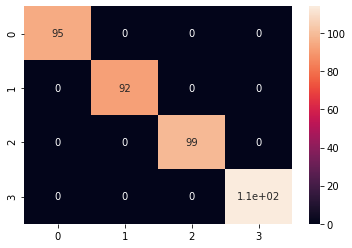

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True)

In [106]:
accuracy_score(y_test,Y_pred,normalize=False)

400

In [107]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00       114

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

